<span style="color:pink">## choose subregion</span>

In [34]:
lon_min_subregion = 130
lon_max_subregion = 145
lat_min_subregion = 10
lat_max_subregion = 20

<span style="color:pink">##</span>

# Imports

In [35]:
%reload_ext autoreload
%matplotlib inline

In [36]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [10]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [11]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [12]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [13]:
toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [14]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11100
 . duration: 12.5
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.18
 . lonInit: 115.04
 . latInit: 20.71
 . Utime_End: 17014.42
 . lonEnd: 116.37
 . latEnd: 21.88
 . lonmin: 114.93
 . latmin: 20.71
 . lonmax: 116.37
 . latmax: 21.89
 . vavg: 4.2
 . dist: 189.2
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32864.0
 . surfmaxkm2_132Wm2: 32592.0
 . surfmaxkm2_110Wm2: 32320.0
 . surfmaxkm2_90Wm2: 31520.0
 . surfcumkm2_172Wm2: 354480.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.6737
 . localtime_End: 17015.1774
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [65]:
# to access an attribute over time:
toocan[36].clusters.surfkm2_132Wm2

[32.0,
 496.0,
 736.0,
 720.0,
 960.0,
 2176.0,
 4352.0,
 7040.0,
 9536.0,
 13568.0,
 19088.0,
 25728.0,
 32736.0,
 38896.0,
 42320.0,
 45104.0,
 46160.0,
 48320.0,
 49856.0,
 52096.0,
 52144.0,
 49952.0,
 43424.0,
 43536.0,
 39072.0,
 35600.0,
 31664.0,
 24528.0,
 18208.0,
 14320.0,
 12368.0,
 10848.0,
 8384.0,
 5552.0,
 4320.0,
 2960.0,
 2592.0,
 3120.0,
 2928.0,
 2464.0,
 2560.0,
 1456.0,
 736.0,
 32.0,
 0.0,
 0.0]

In [16]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

In [17]:
toocan[0]

< MCS_IntParameters object:
 . label: 40
 . qc_MCS: 11101
 . duration: 30.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.19
 . lonInit: 140.84
 . latInit: 15.61
 . Utime_End: 17015.3
 . lonEnd: 134.2
 . latEnd: 15.1
 . lonmin: 134.2
 . latmin: 15.0
 . lonmax: 140.85
 . latmax: 16.06
 . vavg: 6.61
 . dist: 713.37
 . olrmin: 191.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 203984.0
 . surfmaxkm2_132Wm2: 181392.0
 . surfmaxkm2_110Wm2: 153488.0
 . surfmaxkm2_90Wm2: 87632.0
 . surfcumkm2_172Wm2: 4815504.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 1.0
 . localtime_Init: 17014.7662
 . localtime_End: 17015.977
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

# Convert dates

In [67]:
data_reference = dt.datetime(1970, 1, 1)

In [68]:
localtime_Init_dates = []
localtime_End_dates = []
for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)

In [69]:
print(localtime_Init_dates[1])
print(localtime_End_dates[1])

2016-08-01 20:48:28.800000
2016-08-02 13:18:20.160000


# MCS attribute histogram

<span style="color:pink">## choose attribute and number of bins</span>

In [46]:
attribute = "duration"
nbins = 48

<span style="color:pink">##</span>

In [47]:
def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]   
    return attribute_values

In [48]:
# print(attribute)
attribute_list = attr_list(toocan, attribute)

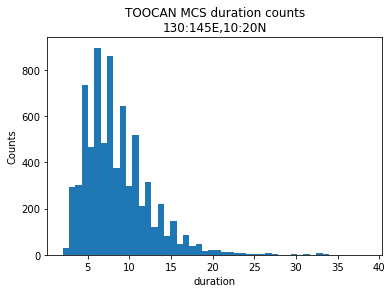

In [49]:
hist, bin_edges, _ = plt.hist(attribute_list, bins=nbins)
plt.xlabel(attribute)
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS {attribute} counts\n{lon_min_subregion}:{lon_max_subregion}E,{lat_min_subregion}:{lat_max_subregion}N")
plt.show()
# plt.savefig(f'histograms/TOOCAN_{attribute}_hist_test.png')

# Variable mean for each binned timestep
* note: for plot of mean, the xlabel for each bar is of the upper bin edge

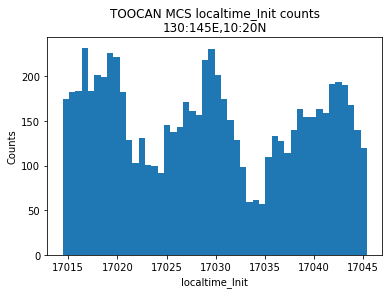

In [50]:
#-- binning times
localtime_Init_list = attr_list(toocan, "localtime_Init")
localtime_Init_hist, localtime_Init_bin_edges, localtime_Init__ = plt.hist(localtime_Init_list, bins=nbins)
plt.xlabel("localtime_Init")
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS localtime_Init counts\n{lon_min_subregion}:{lon_max_subregion}E,{lat_min_subregion}:{lat_max_subregion}N")
plt.show()

In [51]:
# Extract the values of the attribute and localtime_Init from the objects
attribute_values_list = [getattr(obj, attribute) for obj in toocan]
localtime_init_values = [getattr(obj, 'localtime_Init') for obj in toocan]

# Convert localtime_Init bin edges to a NumPy array
localtime_init_bin_edges = np.array(localtime_Init_bin_edges)

# Digitize the localtime_Init values to determine the bin indices for each object
bin_indices = np.digitize(localtime_init_values, localtime_init_bin_edges)

# Calculate the mean of the attribute for each time period bin
mean_values = [np.mean(np.array(attribute_values_list)[bin_indices == i]) for i in range(1, len(localtime_init_bin_edges))]

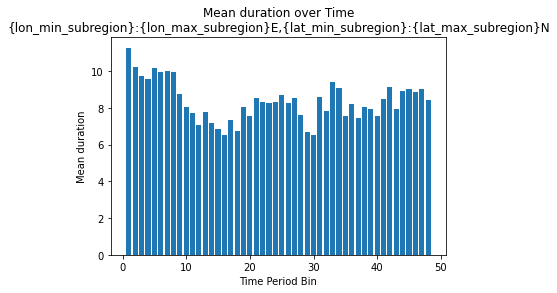

In [52]:
# Plot the mean values for each time period bin
plt.bar(range(1, len(localtime_init_bin_edges)), mean_values)
plt.xlabel('Time Period Bin')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + ' over Time\n{lon_min_subregion}:{lon_max_subregion}E,{lat_min_subregion}:{lat_max_subregion}N')
plt.show()

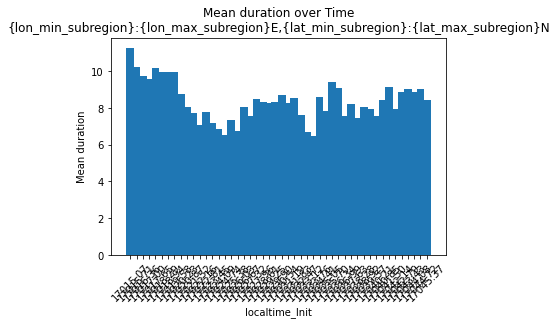

In [53]:
# Plot the mean values for each time period bin
plt.bar(localtime_init_bin_edges[1:], mean_values)
plt.xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + ' over Time\n{lon_min_subregion}:{lon_max_subregion}E,{lat_min_subregion}:{lat_max_subregion}N')

# Set the x-axis tick labels
plt.xticks(localtime_init_bin_edges[1:], rotation=45)

plt.show()

# (UNBINNED) MCS attribute over time

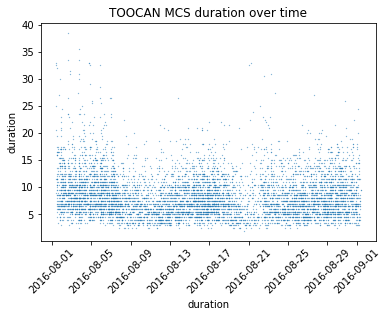

In [70]:
attribute_list = attr_list(toocan, attribute)
plt.scatter(localtime_Init_dates, attribute_list, s=0.05)
plt.xticks(rotation=45)
plt.xlabel(attribute)
plt.ylabel(f"{attribute}")
plt.title(f"TOOCAN MCS {attribute} over time")
plt.show()

# (UNBINNED) Variable mean for each timestep

In [71]:
# Extract the values of the attribute from the objects
attribute_values_list = [getattr(obj, attribute) for obj in toocan]

In [72]:
# Convert the lists to NumPy arrays for easier manipulation
localtime_Init_dates = np.array(localtime_Init_dates)
attribute_values_list = np.array(attribute_values_list)

# Sort the localtime_Init_dates and attribute_values_list based on localtime_Init_dates
sort_indices = np.argsort(localtime_Init_dates)
localtime_Init_dates_ordered = localtime_Init_dates[sort_indices]
attribute_values_list_ordered = attribute_values_list[sort_indices]

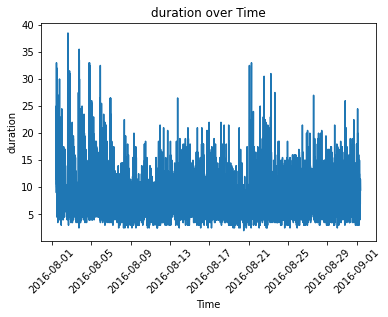

[datetime.datetime(2016, 8, 1, 10, 12, 43, 200000)
 datetime.datetime(2016, 8, 1, 10, 13, 35, 40000)
 datetime.datetime(2016, 8, 1, 10, 21, 30, 240000)
 datetime.datetime(2016, 8, 1, 10, 47, 16, 800000)
 datetime.datetime(2016, 8, 1, 10, 53, 54, 240000)
 datetime.datetime(2016, 8, 1, 10, 57, 38, 880000)
 datetime.datetime(2016, 8, 1, 11, 17, 31, 200000)
 datetime.datetime(2016, 8, 1, 11, 27, 44, 640000)
 datetime.datetime(2016, 8, 1, 11, 28, 1, 920000)
 datetime.datetime(2016, 8, 1, 11, 31, 55, 200000)] [11.5 20.5 25.   9.  32.5 33.  11.5 10.5 19.5 10. ]


In [73]:
# Plot the  values against the unique dates
plt.plot(localtime_Init_dates_ordered, attribute_values_list_ordered)

plt.xticks(rotation=45)
# Set labels and title
plt.xlabel('Time')
plt.ylabel(attribute)
plt.title(attribute + ' over Time')

# Display the plot
plt.show()
print(localtime_Init_dates_ordered[0:10], attribute_values_list_ordered[0:10])

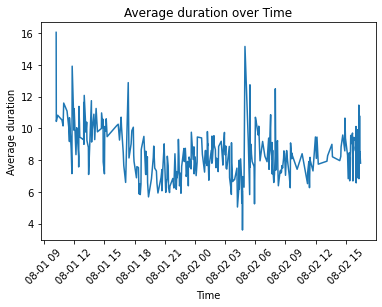

In [74]:
localtime_Init_dates_ordered = np.array(localtime_Init_dates_ordered)
attribute_values_list_ordered = np.array(attribute_values_list_ordered)

# convert localtime_Init_dates_ordered to timestamps in seconds
timestamps = np.array([(date - dt.datetime(1970, 1, 1)).total_seconds() for date in localtime_Init_dates_ordered])

# interval in seconds
interval_seconds = 2 * 60 * 60  # 2 hours

# average attribute values for each time interval
averaged_values = []
start_time = timestamps[0]
sum_values = 0
count = 0

for timestamp, value in zip(timestamps, attribute_values_list_ordered):
    if timestamp - start_time <= interval_seconds:
        sum_values += value
        count += 1
    else:
        averaged_values.append(sum_values / count)
        sum_values = value
        count = 1
        start_time = timestamp

# append the average of the last interval
averaged_values.append(sum_values / count)

# Plot 
plt.plot(localtime_Init_dates_ordered[:len(averaged_values)], averaged_values)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Average ' + attribute)
plt.title('Average ' + attribute + ' over Time')
plt.show()